In [174]:
def set_timestep(df):
    df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%dT%H:%M:%S%z", utc=True)
    df = df.set_index('time')
    return df

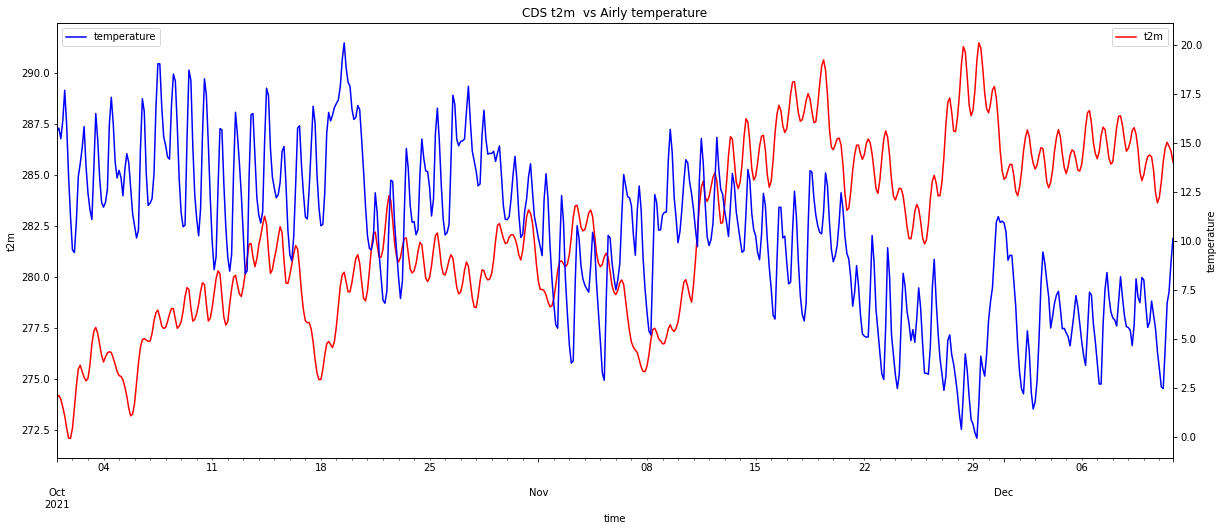

In [190]:
var = 'pm10'
fig, ax = plt.subplots(figsize=(20,8))
ax2 = ax.twinx()
df_final_plot = dataframe_CDS_lond_sep_dec.rolling(center=True, window=6, min_periods=1).mean()
# df_pm10_copy = df_pm10.rolling(center=True, window=6, min_periods=1).mean()
df_ts['temperature'].plot(ax=ax2, label = 'temperature', color ='blue')
df_final_plot.t2m.plot(ax=ax, label = 't2m', color = 'red')
# ax.set_xlim(pd.to_datetime('2021-11-01'), pd.to_datetime('2021-11-30'))
# ax.set_ylim(0,100)
# ax2.set_ylim(0,1000)
plt.title('CDS t2m  vs Airly temperature')
ax2.legend(loc='upper left')
ax2.set_ylabel('temperature')
ax.set_ylabel('t2m')
ax.legend(loc='upper right')
plt.grid(ax2,'minor')
plt.show()

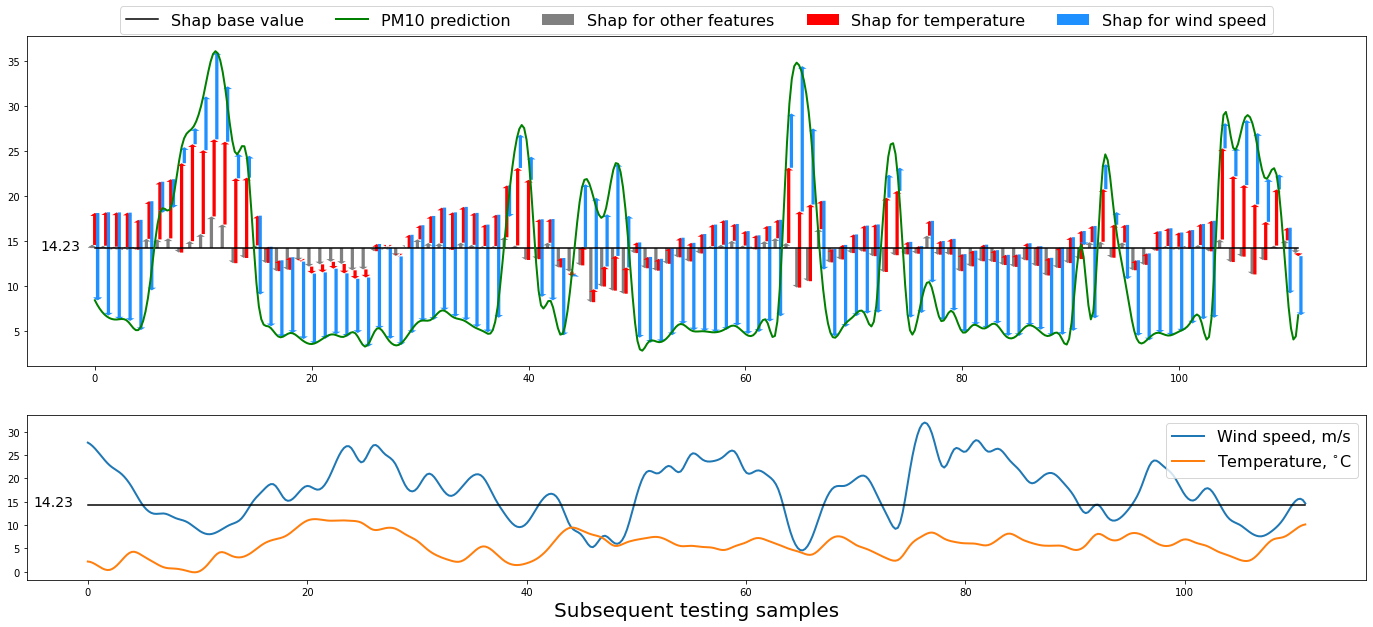

In [223]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(24,10), gridspec_kw={'height_ratios': [2, 1]})
ax1.plot(base, label='Shap base value', color='black')
x = np.arange(len(X_test))
zeros_ = np.zeros(len(X_test))
xnew = np.linspace(x.min(), x.max(), 500)
spl_outpput = make_interp_spline(x, Output_test, k=3)
spl_wind = make_interp_spline(x, X_test['windSpeed'].values, k=3)
spl_temp = make_interp_spline(x, X_test['temperature'].values, k=3)
y_smooth_outpput = spl_outpput(xnew)
y_smooth_wind = spl_wind(xnew)
y_smooth_temp = spl_temp(xnew)
ax1.plot(xnew, y_smooth_outpput, label='PM10 prediction', color='green', linewidth=2)
width = 0.3
for i in range(len(X_test)):
    if i == 0:
        ax1.arrow(x=x[0] - width/1.2, y=base[0], dx=zeros_[0], dy=base_shift[0]-base[0] , width=width, facecolor='grey', edgecolor='none', length_includes_head=True, head_length=.3, head_width=.8, label='Shap for other features')
        ax1.arrow(x=x[0], y=base_shift[0], dx=zeros_[0], dy=data_shap_temp[0], width=width, facecolor='red', edgecolor='none', length_includes_head=True, head_length=.3, head_width=.8, label='Shap for temperature')
        ax1.arrow(x=x[0] + width/1.2, y=base_shift[0]+data_shap_temp[0], dx=zeros_[0], dy=data_shap_wind[0], width=width, facecolor='dodgerblue', edgecolor='none', length_includes_head=True, head_length=.3, head_width=.8, label='Shap for wind speed')
    ax1.arrow(x=x[i] - width/1.2, y=base[i], dx=zeros_[i], dy=base_shift[i]-base[i] , width=width, facecolor='grey', edgecolor='none', length_includes_head=True, head_length=.3, head_width=.8)
    ax1.arrow(x=x[i], y=base_shift[i], dx=zeros_[i], dy=data_shap_temp[i], width=width, facecolor='red', edgecolor='none', length_includes_head=True, head_length=.3, head_width=.8)
    ax1.arrow(x=x[i] + width/1.2, y=base_shift[i]+data_shap_temp[i], dx=zeros_[i], dy=data_shap_wind[i], width=width, facecolor='dodgerblue', edgecolor='none', length_includes_head=True, head_length=.3, head_width=.8)
ax1.legend(loc="upper center", bbox_to_anchor=(0.5, 1.115), ncol=5, fancybox=True, fontsize=16)
ax1.text(-5, 14, '14.23', fontsize = 14)
ax2.set_xlabel('Subsequent testing samples', fontsize=20)
ax2.plot(xnew, y_smooth_wind, label='Wind speed, m/s', linewidth=2)
ax2.plot(xnew, y_smooth_temp, label='Temperature, $^{\circ}$C', linewidth=2)
ax2.plot(base, color='black')
ax2.text(-5, 14, '14.23', fontsize = 14)
ax2.legend(fontsize=16)
#fig.tight_layout(pad=5.0)

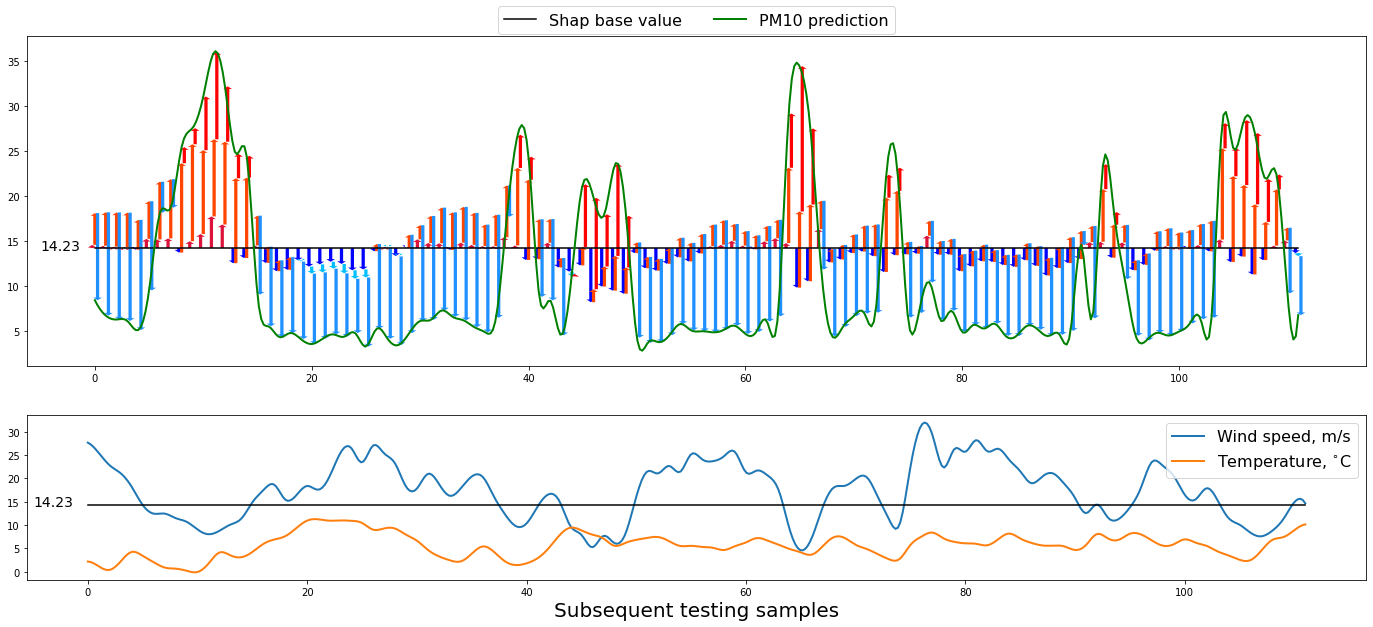

In [224]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(24,10), gridspec_kw={'height_ratios': [2, 1]})
ax1.plot(base, label='Shap base value', color='black')
x = np.arange(len(X_test))
zeros_ = np.zeros(len(X_test))
xnew = np.linspace(x.min(), x.max(), 500)
spl_outpput = make_interp_spline(x, Output_test, k=3)
spl_wind = make_interp_spline(x, X_test['windSpeed'].values, k=3)
spl_temp = make_interp_spline(x, X_test['temperature'].values, k=3)
y_smooth_outpput = spl_outpput(xnew)
y_smooth_wind = spl_wind(xnew)
y_smooth_temp = spl_temp(xnew)
ax1.plot(xnew, y_smooth_outpput, label='PM10 prediction', color='green', linewidth=2)
width = 0.3
for i in range(len(X_test)):
    color = np.where(base_shift[i]-base[i] > 0, 'crimson', 'blue').item()
    ax1.arrow(x=x[i] - width/1.2, y=base[i], dx=zeros_[i], dy=base_shift[i]-base[i] , width=width, facecolor=color, edgecolor='none', length_includes_head=True, head_length=.3, head_width=.8)
    color = np.where(data_shap_temp[i] > 0, 'orangered', 'deepskyblue').item()
    ax1.arrow(x=x[i], y=base_shift[i], dx=zeros_[i], dy=data_shap_temp[i], width=width, facecolor=color, edgecolor='none', length_includes_head=True, head_length=.3, head_width=.8)
    color = np.where(data_shap_wind[i] > 0, 'red', 'dodgerblue').item()
    ax1.arrow(x=x[i] + width/1.2, y=base_shift[i]+data_shap_temp[i], dx=zeros_[i], dy=data_shap_wind[i], width=width, facecolor=color, edgecolor='none', length_includes_head=True, head_length=.3, head_width=.8)
ax1.legend(loc="upper center", bbox_to_anchor=(0.5, 1.115), ncol=5, fancybox=True, fontsize=16)
ax1.text(-5, 14, '14.23', fontsize = 14)
ax2.set_xlabel('Subsequent testing samples', fontsize=20)
ax2.plot(xnew, y_smooth_wind, label='Wind speed, m/s', linewidth=2)
ax2.plot(xnew, y_smooth_temp, label='Temperature, $^{\circ}$C', linewidth=2)
ax2.plot(base, color='black')
ax2.text(-5, 14, '14.23', fontsize = 14)
ax2.legend(fontsize=16)

invalid value encountered in true_divide
invalid value encountered in true_divide


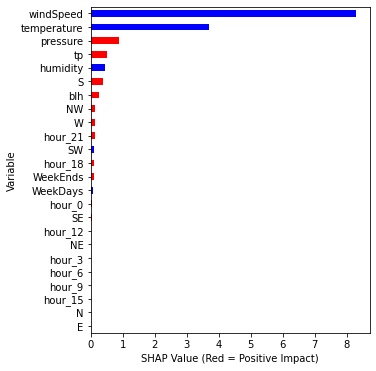

In [152]:
ABS_SHAP(shap_values.values,X_test)